In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = r"C:\Users\m7md7\Desktop\Facial expression\images\train"
TEST_DIR = r"C:\Users\m7md7\Desktop\Facial expression\images\validation"

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                                   image     label
0      C:\Users\m7md7\Desktop\Facial expression\image...     angry
1      C:\Users\m7md7\Desktop\Facial expression\image...     angry
2      C:\Users\m7md7\Desktop\Facial expression\image...     angry
3      C:\Users\m7md7\Desktop\Facial expression\image...     angry
4      C:\Users\m7md7\Desktop\Facial expression\image...     angry
...                                                  ...       ...
28816  C:\Users\m7md7\Desktop\Facial expression\image...  surprise
28817  C:\Users\m7md7\Desktop\Facial expression\image...  surprise
28818  C:\Users\m7md7\Desktop\Facial expression\image...  surprise
28819  C:\Users\m7md7\Desktop\Facial expression\image...  surprise
28820  C:\Users\m7md7\Desktop\Facial expression\image...  surprise

[28821 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)
print(test['image'])

                                                  image     label
0     C:\Users\m7md7\Desktop\Facial expression\image...     angry
1     C:\Users\m7md7\Desktop\Facial expression\image...     angry
2     C:\Users\m7md7\Desktop\Facial expression\image...     angry
3     C:\Users\m7md7\Desktop\Facial expression\image...     angry
4     C:\Users\m7md7\Desktop\Facial expression\image...     angry
...                                                 ...       ...
7061  C:\Users\m7md7\Desktop\Facial expression\image...  surprise
7062  C:\Users\m7md7\Desktop\Facial expression\image...  surprise
7063  C:\Users\m7md7\Desktop\Facial expression\image...  surprise
7064  C:\Users\m7md7\Desktop\Facial expression\image...  surprise
7065  C:\Users\m7md7\Desktop\Facial expression\image...  surprise

[7066 rows x 2 columns]
0       C:\Users\m7md7\Desktop\Facial expression\image...
1       C:\Users\m7md7\Desktop\Facial expression\image...
2       C:\Users\m7md7\Desktop\Facial expression\image...
3       C

In [9]:
from tqdm.notebook import tqdm

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [ ]:
train_features = extract_features(train['image']) 

In [ ]:
test_features = extract_features(test['image'])

In [ ]:
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(train['label'])

In [ ]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

In [ ]:
#model_json = model.to_json()
#with open("emotiondetector.json",'w') as json_file:
#    json_file.write(model_json)
#model.save("emotiondetector.h5")

In [ ]:
model.save('my_model.keras')

In [4]:
from keras.models import load_model

model = load_model(r"C:\Users\m7md7\Desktop\my_model02.keras")


In [5]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [6]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [7]:
image = r"C:\Users\m7md7\Desktop\Facial expression\images\validation\sad\580.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


C:\Users\m7md7\anaconda3\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step
model prediction is  sad


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad


C:\Users\m7md7\anaconda3\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
model prediction is  sad


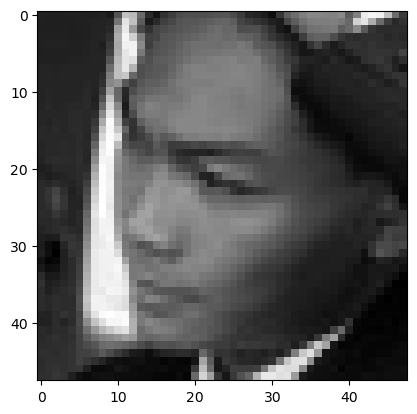

In [9]:
image = r"C:\Users\m7md7\Desktop\Facial expression\images\validation\sad\1026.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
model prediction is  fear


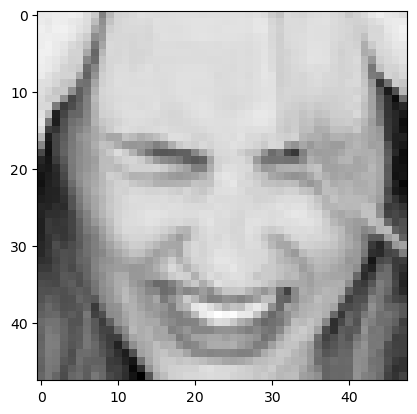

In [10]:
image = r"C:\Users\m7md7\Desktop\Facial expression\images\validation\fear\297.jpg"
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
model prediction is  disgust


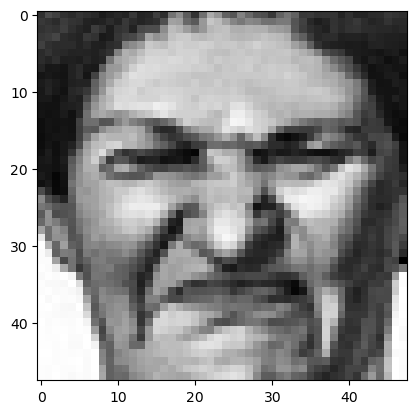

In [11]:
image = r"C:\Users\m7md7\Desktop\Facial expression\images\validation\disgust\7192.jpg"
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
model prediction is  happy


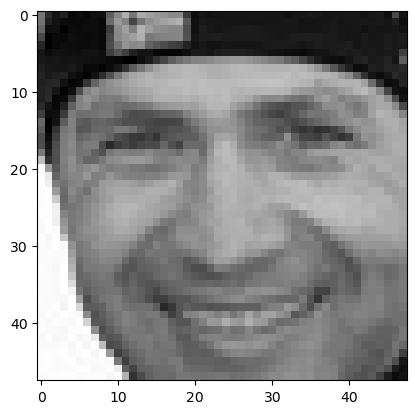

In [12]:
image = r"C:\Users\m7md7\Desktop\Facial expression\images\validation\happy\5269.jpg"
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
model prediction is  surprise


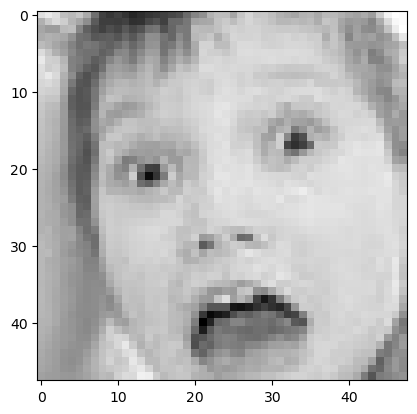

In [13]:
image = r"C:\Users\m7md7\Desktop\Facial expression\images\validation\surprise\2759.jpg"
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
import cv2
from keras.models import load_model
import numpy as np

model = load_model(r"C:\Users\m7md7\Desktop\my_model02.keras")

haar_file = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

webcam = cv2.VideoCapture(0)
labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

while True:
    ret, im = webcam.read()
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(im, 1.3, 5)
    try: 
        for (p, q, r, s) in faces:
            image = gray[q:q+s, p:p+r]
            cv2.rectangle(im, (p, q), (p+r, q+s), (255, 0, 0), 2)
            image = cv2.resize(image, (48, 48))
            img = extract_features(image)
            pred = model.predict(img)
            prediction_label = labels[pred.argmax()]
            cv2.putText(im, '% s' %(prediction_label), (p-10, q-10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 0, 255))
        cv2.imshow("Output", im)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    except cv2.error:
        pass

webcam.release()
cv2.destroyAllWindows()
